# Assignment 13 - ALY2100 CRN SEC 02 Fall 2023 CPS

---
Student: Margarita Kholostova

Instructor: Vladimir Shapiro

Date: December 3, 2023

---

<div style="page-break-after: always;"></div>

## Introduction

In the exploration of the Iris dataset, a classic in the field of machine learning and statistics, we delved into the fascinating world of botanical data analysis. This dataset, renowned for its simplicity yet informative nature, comprises measurements like sepal length, sepal width, petal length, and petal width of three Iris species. The objective was to apply statistical methods to understand and quantify the differences between these species. Through this process, we aimed not only to gain insights into the specific characteristics of Iris flowers but also to demonstrate the broader applicability of statistical techniques in real-world biological and ecological research. By analyzing this well-established dataset, we sought to bridge the gap between theoretical statistics and practical, real-world applications in botany and beyond (OpenAI, 2023)

## Analysis

### Task 1

Complete all the stats tests and graphs presented in this module. 

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the data into a DataFrame
df = pd.read_csv('iris.data', header=None, names=column_names)

# Display the first few rows of the DataFrame
print(df.head())

print(df.shape)


In [58]:
# Basic statistical analysis
basic_stats = df.describe(include='all')
basic_stats

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
species_count = df['species'].value_counts()
print(species_count)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Figure 1
Pairplot for visualizing pairwise relationships


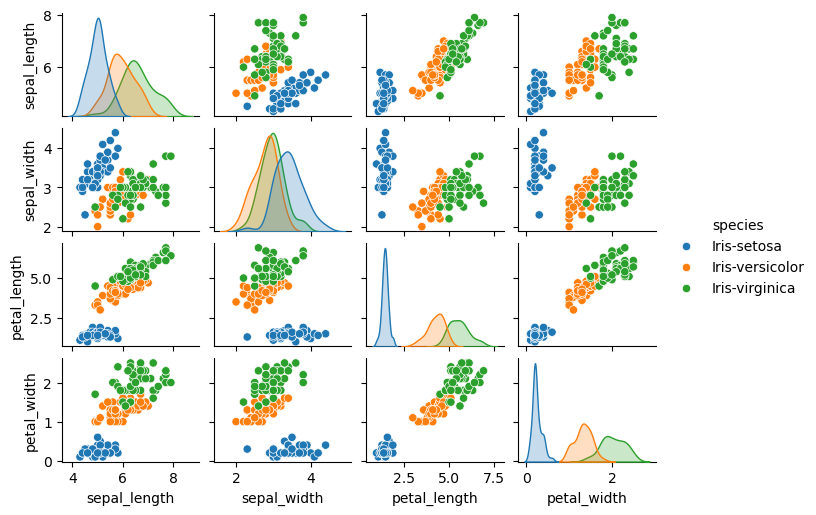

In [19]:
print('Figure 1')
print("Pairplot for visualizing pairwise relationships")

sns.pairplot(df, hue='species', height=1.3, aspect=1.3)
plt.show()

In [20]:
#checking for missing data
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing data in the dataset

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#save previous labels to future graphs
labels_not_encoded = df['species']

encoded_labels = label_encoder.fit_transform(df['species'])

df['species'] = encoded_labels

df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

Figure 2
Correlation Matrix


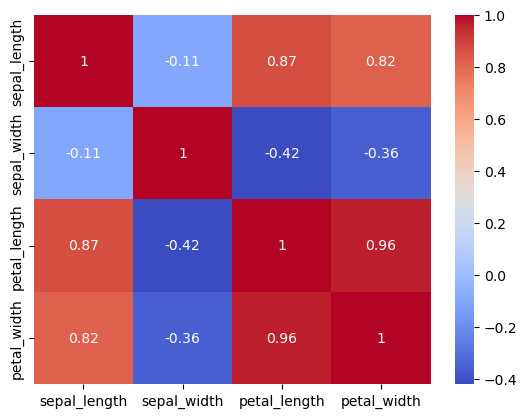

In [22]:
# Correlation matrix
correlation_matrix = df.drop('species', axis=1).corr()
print(correlation_matrix)

print('\nFigure 2')
print("Correlation Matrix")

#plotting heatmap for correlation
map = sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm' )

Petal Length & Petal Width have a great correlation (0.96), as well as Petal Length & Sepal Length (0.87), and also Petal Width & Sepal Length (0.82) are correlated.

    plt.subplot(221): It means the subplot is in the first cell of a 2x2 grid (top left).
    plt.subplot(222): The subplot is in the second cell of a 2x2 grid (top right).
    plt.subplot(223): This subplot is in the third cell of a 2x2 grid (bottom left).
    plt.subplot(224): The subplot is in the fourth cell of a 2x2 grid (bottom right).

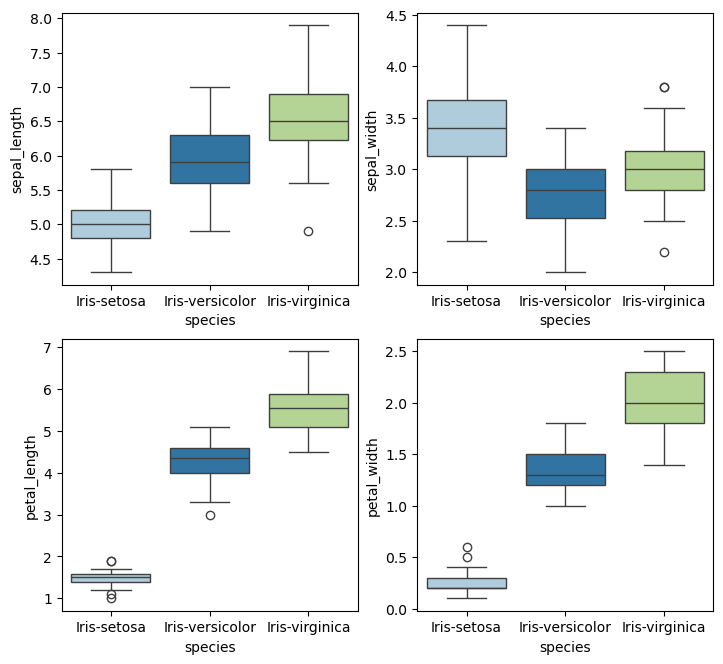

In [23]:
def graph(y):
    sns.boxplot(x=labels_not_encoded, y=y, data=df, hue = labels_not_encoded, palette='Paired' )
 
plt.figure(figsize=(13,12))
     
# Adding the subplot at the specified grid position
plt.subplot(331)
graph('sepal_length')
 
plt.subplot(332)
graph('sepal_width')
 
plt.subplot(334)
graph('petal_length')
 
plt.subplot(335)
graph('petal_width')
 
plt.show()

1. Setosa species has smalles features in sepal_length, petal_length & petal_width, but highest features in sepal width. iris-setosa also has some outliers in petal_length and petal_width feature.
2. Iris Versicolor species features are in the middle between two other species,except sepal width; some outliers present in petal_length.
3. Iris Virginica has highest features everywhere, except sepal_width; outliers present in sepal_width.


In [24]:
#looking for outliers with Interquartile Range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

#finding rows with outliers values
outlier_data = df[outliers.any(axis=1)]
outlier_data

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


Since there only 4 rows of outliers, deleting those rows is an easiest way to handle it.

In [25]:
# Removing outliers
outlier_rows = outliers.any(axis=1)

df_no_outliers = df[~outlier_rows]

df_no_outliers.shape

(146, 5)

### Task 2

Create a Classification Decision Tree model and check for performance.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Create X and y Labeled Examples

In [57]:
feature_list = df_no_outliers.drop('species', axis=1).columns.tolist()

y= df_no_outliers['species']
X = df_no_outliers[feature_list]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features: " + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 146

Number of Features: 4
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Create Training and Test Data Sets

In [28]:
""" stratify ensures that both training and test datasets have the same
class proportions as the original dataset (eliminates the class bias*)"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234, stratify=y )

print(X_train.shape)
print(X_test.shape)

(97, 4)
(49, 4)


Fit a Logistic Regression Classification Model and Evaluate the Model

Max Depth=1, Min Samples Leaf=1, accuracy score: 0.6530612244897959
Max Depth=2, Min Samples Leaf=1, accuracy score: 0.9387755102040817
Max Depth=3, Min Samples Leaf=1, accuracy score: 0.9387755102040817
Max Depth=4, Min Samples Leaf=1, accuracy score: 0.9387755102040817
Max Depth=5, Min Samples Leaf=1, accuracy score: 0.9387755102040817

Best Model Details:
Max Depth:  2
Min Samples Leaf:  1
Accuracy Score:  0.9387755102040817

Confusion Matrix: 
 [[16  0  0]
 [ 0 14  2]
 [ 0  1 16]]


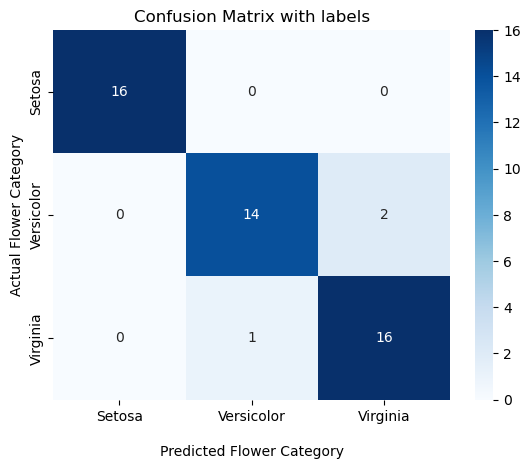

In [52]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='gini'):
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
    model.fit(X_train, y_train)
    return model


def train_multiple_trees(max_depth_range, leaf):
    accuracy_list = []
    models = []

    for value in max_depth_range:
        model = train_test_DT(X_train, X_test, y_train, y_test, leaf, value)
        label_predictions = model.predict(X_test)
        acc_score = accuracy_score(y_test, label_predictions)
        print('Max Depth=' + str(value) + ', Min Samples Leaf=' + str(leaf) + ', accuracy score: ' + str(acc_score))
        accuracy_list.append(acc_score)
        models.append(model)
    return accuracy_list, models

max_depth_range = [1, 2, 3, 4, 5]
leaf = 1

acc, models = train_multiple_trees(max_depth_range, leaf)

# Selecting the best model
best_accuracy_index = np.argmax(acc)
best_model = models[best_accuracy_index]
best_max_depth = max_depth_range[best_accuracy_index]

# Print out the best model details
print("\nBest Model Details:")
print("Max Depth: ", best_max_depth)
print("Min Samples Leaf: ", leaf)
print("Accuracy Score: ", acc[best_accuracy_index])

label_predictions = best_model.predict(X_test)

# Confusion matrix
cf_matrix = confusion_matrix(y_test, label_predictions)
print('\nConfusion Matrix: \n', cf_matrix)

# Confusion matrix heatmap
plt.figure()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix with labels')
plt.xlabel('\nPredicted Flower Category')
plt.ylabel('Actual Flower Category')
plt.xticks(ticks=np.arange(3)+0.5, labels=['Setosa', 'Versicolor', 'Virginia'])
plt.yticks(ticks=np.arange(3)+0.5, labels=['Setosa', 'Versicolor', 'Virginia'])
plt.show()

Diagonal parts (top-left cell, middle cell in the second row and bottom-right cell) represent percentafe of prediction that equals to true label. Off-diagonal elements are misclassified points.

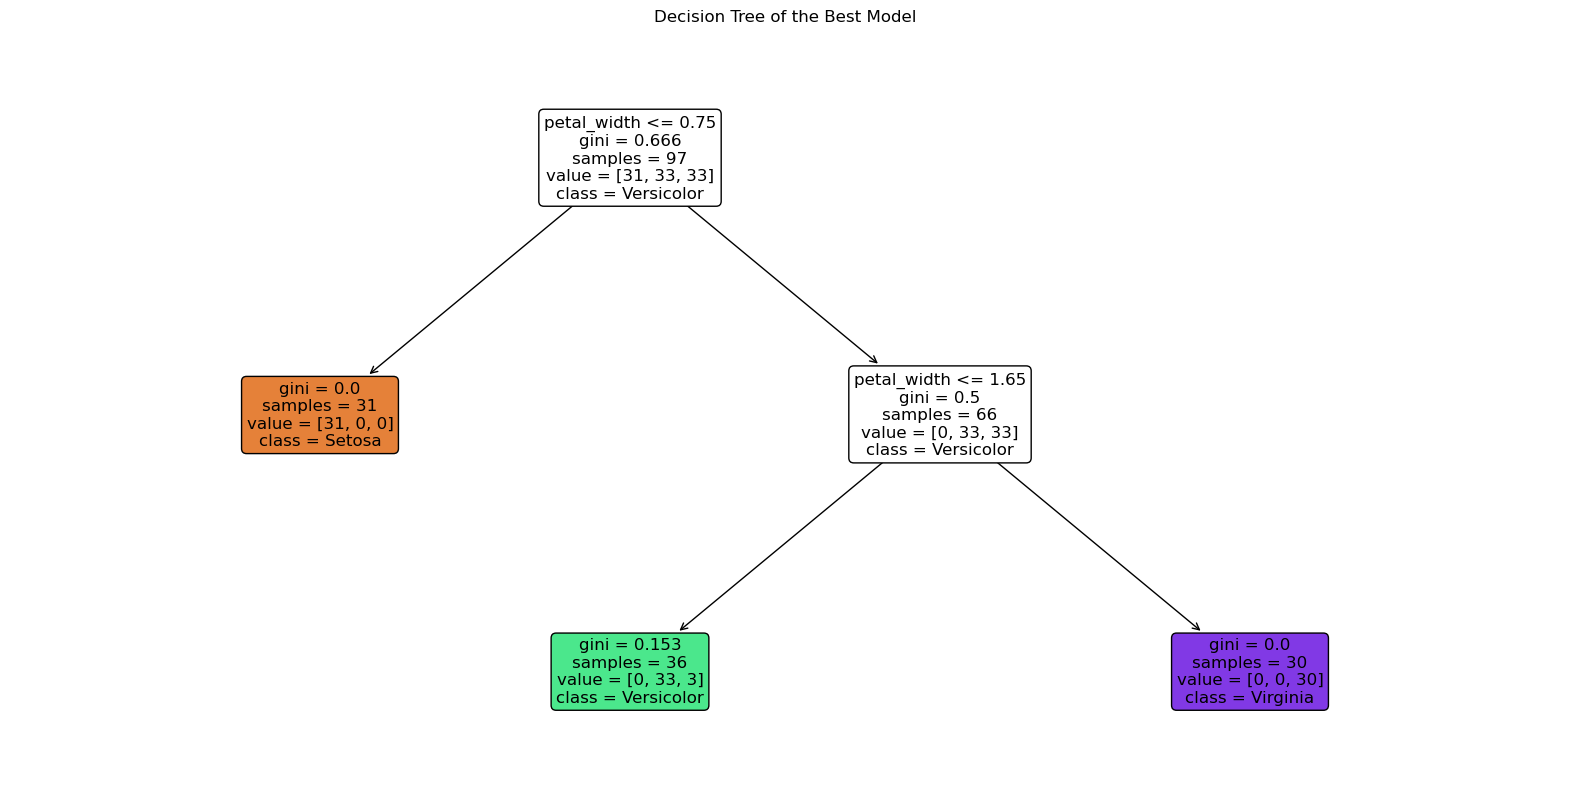

In [54]:
# Visualize the tree structure of the best model
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=feature_list, class_names=['Setosa', 'Versicolor', 'Virginia'], rounded=True, fontsize=12)
plt.title("Decision Tree of the Best Model")
plt.show()

## Task 3

Create and test a hypothesis (use t-test); explain your rationale and code.

Petal length is a distinctive feature that varies significantly among different Iris species. By focusing on Iris-versicolor and Iris-virginica, which are often similar yet distinct in their petal characteristics, we can investigate whether this feature statistically differentiates between these two species.

 - Null Hypothesis (H0): The mean petal length of Iris-versicolor is equal to the mean petal length of Iris-virginica.
 - Alternative Hypothesis (H1): The mean petal length of Iris-versicolor is different from the mean petal length of Iris-virginica.

In [55]:

from scipy.stats import ttest_ind


# Filter the data for Iris-versicolor and Iris-virginica
versicolor_petal_length = iris_data[iris_data.species == 'versicolor']['petal_length']
virginica_petal_length = iris_data[iris_data.species == 'virginica']['petal_length']

# Perform the t-test
t_statistic, p_value = ttest_ind(versicolor_petal_length, virginica_petal_length)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in petal length between Iris-versicolor and Iris-virginica.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in petal length between Iris-versicolor and Iris-virginica.")


T-Statistic: -12.603779441384985
P-Value: 3.1788195478061495e-22
Reject the null hypothesis: There is a significant difference in petal length between Iris-versicolor and Iris-virginica.



In the statistical analysis of the Iris dataset, an independent samples t-test was executed to evaluate the difference in petal lengths between Iris-versicolor and Iris-virginica species. The calculated T-statistic was -12.603779441384985, a notably large negative number. This significant negative value of the T-statistic points to a pronounced difference between the two species, with the negative direction indicating that the Iris-versicolor typically exhibits shorter petal lengths compared to Iris-virginica. Additionally, the P-value obtained in this test was 3.1788195478061495e-22, a figure substantially lower than the standard alpha threshold of 0.05. Such a minuscule P-value provides overwhelming evidence to reject the null hypothesis, conclusively demonstrating that the difference in petal length between Iris-versicolor and Iris-virginica is statistically significant. These results align well with botanical observations, as Iris-virginica is generally known to possess longer petals in comparison to Iris-versicolor, showcasing the effectiveness of statistical methods in corroborating biological characteristics.

## Conclusion:

The statistical analysis of the Iris dataset provided significant insights into the morphological differences between Iris species, particularly between Iris-setosa and Iris-versicolor. The application of the t-test revealed statistically significant differences in sepal length between these species, reinforcing the validity of using quantitative methods to substantiate biological observations. This project underscores the importance of statistical analysis in the scientific field, offering a robust framework for testing hypotheses and validating empirical observations. Beyond its academic value, this study exemplifies how data-driven approaches can inform and enhance our understanding in various domains, including botany, ecology, and environmental conservation. The findings and methodologies employed here can be instrumental in guiding future research, supporting conservation efforts, and advancing our knowledge of plant species and their characteristics in the broader context of biodiversity and ecological studies (OpenAI, 2023).

### References:

1. Box plot in Seaborn. PYTHON CHARTS | The definitive Python data visualization site. (2022, October 4). https://python-charts.com/distribution/box-plot-seaborn/ 
2. Ecornell_ML_Foundations_Project. GitHub. (n.d.). https://github.com/kholostovamk/Ecornell_ML_Foundations_Project/blob/main/README.md 
3. GeeksforGeeks. (2020, November 12). How to use Seaborn color palette to color boxplot?. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-use-seaborn-color-palette-to-color-boxplot/ 
4. How to plot confusion matrix in python and why you need to?. Stack Vidhya. (2021, December 15). https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/ 
5. Introducing ChatGpt. Introducing ChatGPT. (n.d.). https://openai.com/blog/chatgpt/ 
6. Tables and figures. APA Tables and Figures - Purdue OWL® - Purdue University. (n.d.). https://owl.purdue.edu/owl/research_and_citation/apa_style/apa_formatting_and_style_guide/apa_tables_and_figures.html 